
"""

Performance Variables 

- Wins 
- Places
- Win as Favs 
- Place as Favs
- Wins as Underdogs
- Place as Underdogs

"""


# Import the code 


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()

#sys.path.append(f'{fileloc}')

print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:
DEBUG = True

In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:


df.ft_raw = pd.read_csv(f'{fileloc}/raw_base_2022-12-03.csv', parse_dates = True)

print(df.ft_raw.shape)
print(df.ft_raw.columns.values.tolist())



(588017, 33)
['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [8]:

print(pd.DataFrame(df.ft_raw.position.value_counts()).transpose())

print(pd.DataFrame(df.ft_raw.x_num_dogs.value_counts()).transpose())


              1      2      3      4      5      6      7      8
position  81676  81581  81541  81509  81484  76107  61361  42758
                 8       7      6      5
x_num_dogs  342416  130487  88344  26770


### B) Create Variable for Performance

In [9]:

df_base_perf = df.ft_raw.copy()


In [10]:

# Sort for Easy QC
df_base_perf.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)


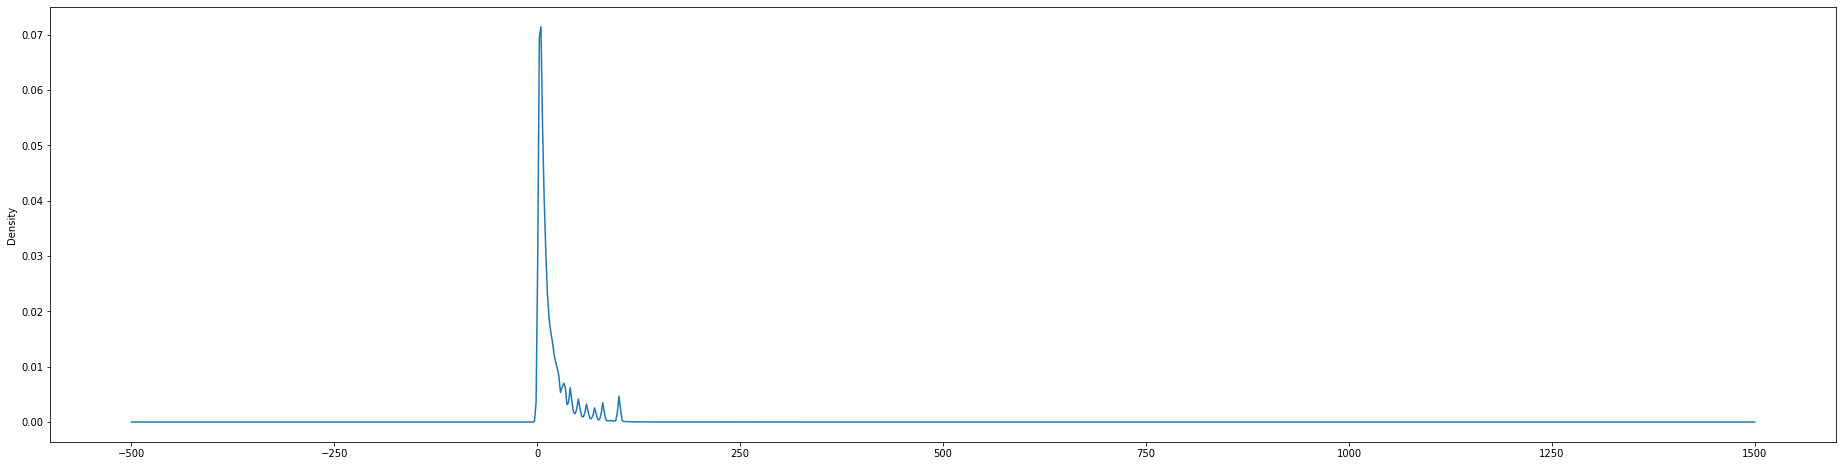

In [12]:

df_base_perf['ft_sp'].plot(kind = 'density', figsize= (32,8) )


In [13]:

# Ranks based on the Fast Track sp
groupings = ['@id_RACE']

# For groupby doglevel
doglevel = ['@id_DOG']


## Rank for Place Preds
print(datetime.now())
df_base_perf["position_fasttrack"] = df_base_perf.groupby(groupings)["ft_sp"].rank("dense", ascending=True)
print(datetime.now())


2022-12-03 04:50:01.222133
2022-12-03 04:50:01.367459


##### Wins related Performance 

In [20]:

# Total Races
df_base_perf.loc[:,"xr_races"] = df_base_perf.groupby(doglevel).cumcount()

# Total Races in last 5 
df_base_perf.loc[:,"xr_races_l5"] = df_base_perf.groupby(doglevel).rolling(5, min_periods=1)['xr_races'].count().reset_index(0,drop=True)



#Wins by a Dog
df_base_perf.loc[:,"wins"] = df_base_perf['position'].apply(lambda x : 1 if x == '1' else 0 )



# Rolling wins for each Dog
df_base_perf.loc[:,"wins_prev"] = df_base_perf.groupby(doglevel)['wins'].shift(1)

df_base_perf.loc[:,"xr_wins"] = df_base_perf.groupby(doglevel)['wins_prev'].rolling(window=999, min_periods = 1).sum().reset_index(0,drop=True)
df_base_perf['xr_wins'].fillna(0, inplace = True)

df_base_perf.loc[:,"xr_wins_pct"] = df_base_perf['xr_wins'] / df_base_perf['xr_races']
df_base_perf['xr_wins_pct'].fillna(0, inplace = True)


## Wins in the Last 5 Races
df_base_perf.loc[:,"xr_wins_l5"] = df_base_perf.groupby(doglevel)['wins_prev'].rolling(window=5, min_periods = 1).sum().reset_index(0,drop=True)
df_base_perf['xr_wins_l5'].fillna(0, inplace = True)

df_base_perf.loc[:,"xr_wins_l5_pct"] = df_base_perf['xr_wins_l5'] / df_base_perf['xr_races_l5']


print(datetime.now())

#.rolling(8, min_periods=1, on='Date')['Sold'].sum().reset_index()['Sold']


2022-12-03 05:21:55.642301


In [32]:

#df_base_perf[ df_base_perf['@id_DOG'].isin( [109766097, 113531628] ) ].head(45)
df_base_perf[135:145]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,TrainerName,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,position_fasttrack,xr_races,xr_races_l5,wins,wins_prev,xr_wins,xr_wins_pct,xr_wins_l5,xr_wins_l5_pct,fin_t2,fin_t2_prev,xr_fin_t2,xr_finl5_t2,xr_fin_t2_pct,xr_finl5_t2_pct
135,115152021,4,KING JEREMY,6.0,6,38.3,$21.00,NaN,4.25,1.29,NaN,0,NaN,4.56,17.23,0.0,638811645,289547,T Bradley,638811645,6,RURAL CITY OF MURRAY BRIDGE STAKE,01:09PM,300m,Grade 5,Murray Bridge,09 Feb 21,2021-02-09,21.0,7,4,4.25,4,6.0,2,3.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.0
136,115152021,2,KING JEREMY,2.0,2,38.0,$4.80,NaN,1.75,1.71,NaN,0,NaN,4.54,16.95,160.0,640881752,289547,T Bradley,640881752,3,METRO ROLLER DOORS (5+ WINS N/P) STAKE,12:15PM,300m,Special Event Non Penalty,Murray Bridge,16 Feb 21,2021-02-16,4.8,5,2,1.75,2,3.0,3,4.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.000000,0.0
137,115152021,6,KING JEREMY,2.0,2,37.3,$101.00,NaN,4.25,0.14,6,0,NaN,4.59,17.11,0.0,645453386,289547,T Bradley,645453386,7,METRO ROLLER DOORS,01:44PM,300m,Grade 5 Heat,Murray Bridge,02 Mar 21,2021-03-02,101.0,8,6,4.25,6,7.0,4,5.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.250000,0.2
138,115152021,4,KING JEREMY,7.0,7,37.7,$11.00,NaN,4.25,1.14,NaN,0,NaN,4.57,17.18,105.0,647734905,289547,T Bradley,647734905,10,SKY RACING (5+ WINS N/P) STAKE,02:55PM,300m,Special Event Non Penalty,Murray Bridge,09 Mar 21,2021-03-09,11.0,6,4,4.25,4,4.0,5,5.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.200000,0.2
139,115152021,4,KING JEREMY,1.0,1,38.3,$34.00,NaN,1.75,0.00,NaN,0,NaN,4.49,17.01,0.0,650237621,289547,T Bradley,650237621,8,KURT DONSBERG PHOTOGRAPHY STAKE,02:07PM,300m,Grade 5,Murray Bridge,23 Mar 21,2021-03-23,34.0,8,4,1.75,4,6.0,6,5.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.166667,0.2
140,115152021,4,KING JEREMY,5.0,5,37.5,$31.00,NaN,2.50,0.86,NaN,0,NaN,4.58,16.92,105.0,656343044,289547,T Bradley,656343044,4,METRO ROLLER DOORS (N/P) STAKE,09:10AM,300m,Restricted Win,Murray Bridge,17 Apr 21,2021-04-17,31.0,6,4,2.50,4,5.0,7,5.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.142857,0.2
141,115152021,3,KING JEREMY,5.0,5,37.2,$21.00,NaN,2.00,0.14,NaN,0,NaN,4.61,16.99,130.0,663047537,289547,T Bradley,663047537,5,SKY RACING (N/P) STAKE,12:49PM,300m,Restricted Win,Murray Bridge,28 Apr 21,2021-04-28,21.0,8,3,2.00,3,6.0,8,5.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.125000,0.2
142,115152021,3,KING JEREMY,4.0,4,36.8,$41.00,NaN,4.00,1.71,NaN,0,NaN,4.57,16.91,80.0,667670251,289547,T Bradley,667670251,5,TABCORP STAKE,01:02PM,300m,Grade 5,Murray Bridge,12 May 21,2021-05-12,41.0,5,3,4.00,3,4.0,9,5.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.111111,0.0
143,115152021,2,KING JEREMY,8.0,8,37.0,$12.00,NaN,1.75,1.71,NaN,0,NaN,4.57,16.86,160.0,670592539,289547,T Bradley,670592539,10,SKY RACING STAKE,02:47PM,300m,Grade 5,Murray Bridge,19 May 21,2021-05-19,12.0,6,2,1.75,2,4.0,10,5.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.100000,0.0
144,115152021,2,KING JEREMY,2.0,2,38.0,$7.00,NaN,1.00,1.00,NaN,0,NaN,4.50,16.83,160.0,672986829,289547,T Bradley,672986829,9,TABCORP STAKE,02:12PM,300m,Grade 5,Murray Bridge,26 May 21,2021-05-26,7.0,5,2,1.00,2,2.0,11,5.0,0,0.0,0.0,0.0,0.0,0.0,1,1.0,2.0,1.0,0.181818,0.2


In [30]:

#Top 2 Finish
#df_base_perf.loc[:,"fin_t2"] = df_base_perf['position'].apply(lambda x : 1 if x in ['1','2'] else 0 )
df_base_perf.loc[:,"fin_t2"] = df_base_perf['position'].apply(lambda x : 1 if x in [1,2] else 0 )

# Rolling wins for each Dog
df_base_perf.loc[:,"fin_t2_prev"] = df_base_perf.groupby(doglevel)['fin_t2'].shift(1)
df_base_perf.loc[:,"xr_fin_t2"] = df_base_perf.groupby(doglevel)['fin_t2_prev'].rolling(window=999, min_periods = 1).sum().reset_index(0,drop=True)

df_base_perf.loc[:,"xr_finl5_t2"] = df_base_perf.groupby(doglevel)['fin_t2_prev'].rolling(window=5, min_periods = 1).sum().reset_index(0,drop=True)

df_base_perf['xr_fin_t2'].fillna(0, inplace = True)
df_base_perf.loc[:,"xr_fin_t2_pct"] = df_base_perf['xr_fin_t2'] / df_base_perf['xr_races']
df_base_perf['xr_fin_t2_pct'].fillna(0, inplace = True)

df_base_perf['xr_finl5_t2'].fillna(0, inplace = True)
df_base_perf.loc[:,"xr_finl5_t2_pct"] = df_base_perf['xr_finl5_t2'] / df_base_perf['xr_races_l5']
df_base_perf['xr_finl5_t2_pct'].fillna(0, inplace = True)

print(datetime.now())


2022-12-03 05:32:21.964890


In [31]:

print(df_base_perf.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'position_fasttrack', 'xr_races', 'xr_races_l5', 'wins', 'wins_prev', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'fin_t2', 'fin_t2_prev', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct']


##### Last position related performance

In [33]:

#Finish Last
#df_base_perf.loc[:,"fin_t2"] = df_base_perf['position'].apply(lambda x : 1 if x in ['1','2'] else 0 )
df_base_perf.loc[:,"fin_last"] = df_base_perf.apply(lambda x : 1 if x.position == x.x_num_dogs else 0 , axis = 1)

# Rolling wins for each Dog
df_base_perf.loc[:,"fin_last_prev"] = df_base_perf.groupby(doglevel)['fin_last'].shift(1)
df_base_perf.loc[:,"xr_fin_last"] = df_base_perf.groupby(doglevel)['fin_last_prev'].rolling(window=999, min_periods = 1).sum().reset_index(0,drop=True)

df_base_perf['xr_fin_last'].fillna(0, inplace = True)
df_base_perf.loc[:,"xr_fin_last_pct"] = df_base_perf['xr_fin_last'] / df_base_perf['xr_races']
df_base_perf['xr_fin_last_pct'].fillna(0, inplace = True)


df_base_perf.loc[:,"xr_finl5_last"] = df_base_perf.groupby(doglevel)['fin_last_prev'].rolling(window=5, min_periods = 1).sum().reset_index(0,drop=True)

df_base_perf['xr_finl5_last'].fillna(0, inplace = True)
df_base_perf.loc[:,"xr_finl5_last_pct"] = df_base_perf['xr_finl5_last'] / df_base_perf['xr_races_l5']
df_base_perf['xr_finl5_last_pct'].fillna(0, inplace = True)

print(datetime.now())


2022-12-03 05:35:18.783468


In [34]:

#Finish Last x 2
#df_base_perf.loc[:,"fin_t2"] = df_base_perf['position'].apply(lambda x : 1 if x in ['1','2'] else 0 )
df_base_perf.loc[:,"fin_last2"] = df_base_perf.apply(lambda x : 1 if (x.position == x.x_num_dogs) | (x.position == x.x_num_dogs - 1) else 0 , axis = 1)


# Rolling wins for each Dog
df_base_perf.loc[:,"fin_last2_prev"] = df_base_perf.groupby(doglevel)['fin_last2'].shift(1)
df_base_perf.loc[:,"xr_fin_last2"] = df_base_perf.groupby(doglevel)['fin_last2_prev'].rolling(window=999, min_periods = 1).sum().reset_index(0,drop=True)

df_base_perf['xr_fin_last2'].fillna(0, inplace = True)
df_base_perf.loc[:,"xr_fin_last2_pct"] = df_base_perf['xr_fin_last2'] / df_base_perf['xr_races']
df_base_perf['xr_fin_last2_pct'].fillna(0, inplace = True)


df_base_perf.loc[:,"xr_finl5_last2"] = df_base_perf.groupby(doglevel)['fin_last2_prev'].rolling(window=5, min_periods = 1).sum().reset_index(0,drop=True)

df_base_perf['xr_finl5_last2'].fillna(0, inplace = True)
df_base_perf.loc[:,"xr_finl5_last2_pct"] = df_base_perf['xr_finl5_last2'] / df_base_perf['xr_races_l5']
df_base_perf['xr_finl5_last2_pct'].fillna(0, inplace = True)

print(datetime.now())


2022-12-03 05:37:41.105534


##### Place related performance

In [35]:

#Create a Placed variable 
'''
df_base_perf.loc[:,"fin_plc"] = df_base_perf.apply(lambda x : 1 if (x.position in ['1','2','3']) & (x.x_num_dogs >=8)\
                                    else 1 if (x.position in ['1','2']) & (x.x_num_dogs >= 5)\
                                    else 0 if (x.x_num_dogs < 5)\
                                    else 0, axis = 1)
'''
    
df_base_perf.loc[:,"fin_plc"] = df_base_perf.apply(lambda x : 1 if (x.position in [1,2,3]) & (x.x_num_dogs >=8)\
                                    else 1 if (x.position in [1,2]) & (x.x_num_dogs >= 5)\
                                    else 0 if (x.x_num_dogs < 5)\
                                    else 0, axis = 1)

# Rolling wins for each Dog
df_base_perf.loc[:,"fin_plc_prev"] = df_base_perf.groupby(doglevel)['fin_plc'].shift(1)

df_base_perf.loc[:,"xr_fin_plc"] = df_base_perf.groupby(doglevel)['fin_plc_prev'].rolling(window=999, min_periods = 1).sum().reset_index(0,drop=True)

df_base_perf['xr_fin_plc'].fillna(0, inplace = True)
df_base_perf.loc[:,"xr_fin_plc_pct"] = df_base_perf['xr_fin_plc'] / df_base_perf['xr_races']
df_base_perf['xr_fin_plc_pct'].fillna(0, inplace = True)


df_base_perf.loc[:,"xr_finl5_plc"] = df_base_perf.groupby(doglevel)['fin_plc_prev'].rolling(window=5, min_periods = 1).sum().reset_index(0,drop=True)

df_base_perf['xr_finl5_plc'].fillna(0, inplace = True)
df_base_perf.loc[:,"xr_finl5_plc_pct"] = df_base_perf['xr_finl5_plc'] / df_base_perf['xr_races_l5']
df_base_perf['xr_finl5_plc_pct'].fillna(0, inplace = True)

print(datetime.now())


2022-12-03 05:39:50.882673


In [36]:

print( pd.DataFrame(df_base_perf.isna().sum() ).transpose() )


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  y_runtime  Prizemoney  RaceId  TrainerId  TrainerName  @id_RACE  RaceNum  \
0        0      0        0    0    0       1           0    588017        0    81676  78666       0    284915        98691          0      183606       0          0            0         0        0   

   RaceName  RaceTime  Distance  RaceGrade  ...  xr_wins_l5_pct  fin_t2  fin_t2_prev  xr_fin_t2  xr_finl5_t2  xr_fin_t2_pct  xr_finl5_t2_pct  fin_last  fin_last_prev  xr_fin_last  xr_fin_last_pct  \
0        15         0         0          0  ...               0       0        26806          0            0              0                0         0          26806            0                0   

   xr_finl5_last  xr_finl5_last_pct  fin_last2  fin_last2_prev  xr_fin_last2  xr_fin_last2_pct  xr_finl5_last2  xr_finl5_last2_pct  fin_plc  fin_plc_prev  xr_fin_plc  xr_fin_plc_pct  xr_finl5_plc  \
0

In [37]:

df_base_perf[25:30]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,TrainerName,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,...,xr_wins_l5_pct,fin_t2,fin_t2_prev,xr_fin_t2,xr_finl5_t2,xr_fin_t2_pct,xr_finl5_t2_pct,fin_last,fin_last_prev,xr_fin_last,xr_fin_last_pct,xr_finl5_last,xr_finl5_last_pct,fin_last2,fin_last2_prev,xr_fin_last2,xr_fin_last2_pct,xr_finl5_last2,xr_finl5_last2_pct,fin_plc,fin_plc_prev,xr_fin_plc,xr_fin_plc_pct,xr_finl5_plc,xr_finl5_plc_pct
25,109032188,4,DESTINI TRUCKER,6.0,6,33.9,$11.00,NaN,5.37,1.97,M/43,4,NaN,8.56,23.01,NaN,637193352,130173,R Winter,637193352,12,THE OAKS FUNCTION CENTRE HT3,10:29PM,400m,Grade 5 Heat,...,0.0,0,0.0,1.0,1.0,0.333333,0.25,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,2.0,0.666667,2.0,0.5
26,109032188,6,DESTINI TRUCKER,8.0,9,33.8,$45.00,NaN,10.37,1.04,M/355,0,NaN,5.32,25.50,NaN,640627712,130173,R Winter,640627712,7,GRV VIC BRED SERIES HT2,07:52PM,440m,Grade 5 Heat,...,0.0,0,0.0,1.0,1.0,0.250000,0.20,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,0.500000,2.0,0.4
27,109032188,1,DESTINI TRUCKER,1.0,1,34.1,$16.00,NaN,1.91,NaN,Q/111,0,NaN,5.27,25.15,NaN,643136707,130173,R Winter,643136707,10,MAFFRA POLY & PUMPS,08:47PM,440m,Grade 5,...,0.0,1,0.0,1.0,1.0,0.200000,0.20,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0,2.0,0.400000,2.0,0.4
28,109032188,4,DESTINI TRUCKER,2.0,2,34.4,$9.40,NaN,3.91,1.41,M/64,0,NaN,9.75,17.79,NaN,645386699,130173,R Winter,645386699,10,TAB - LONG MAY WE PLAY,04:52PM,311m,Grade 4,...,0.0,0,1.0,2.0,1.0,0.333333,0.20,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,3.0,0.500000,2.0,0.4
29,109032188,2,DESTINI TRUCKER,1.0,1,34.0,$7.30,NaN,0.43,0.43,M/11,1,NaN,9.89,18.13,NaN,691658567,130173,R Winter,691658567,12,DOWNLOAD THE WATCHDOG APP,10:34PM,311m,Grade 5,...,0.0,1,0.0,2.0,1.0,0.285714,0.20,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0,3.0,0.428571,2.0,0.4


#### C) Create Performance Calculation Variables 

In [90]:

#For the Wins in RaceType for the future

"""
# ADDITIONAL VARIABLES
grouplevel = ['@id_DOG','x_dist_gp']

# GROUPED X_DIST 
df.ft['x_dist_gp'] = df.ft['x_dist'].apply(lambda x : 300 if x < 330 else 350 if x < 380 else 400 if x < 420 else 450 if x < 485 else 500 if x < 550 else 600 if x < 650 else 700 if x < 750 else -999)
df.ft['x_runtm_gp'] = ( df.ft['RunTime'] / df.ft['x_dist'] ) * df.ft['x_dist_gp']

df.ft['x_rtgp_prev'] = df.ft.groupby(grouplevel)['x_runtm_gp'].shift(1)

#df.ft['x_rtgp_avg'] = df.ft.groupby(grouplevel)['x_rtgp_prev'].rolling(window=99, min_periods = 1).mean().reset_index(drop=True)
df.ft['x_rtgp_avg'] = df.ft.groupby(grouplevel)['x_rtgp_prev'].rolling(window=99, min_periods = 1).mean().values

#df.ft['x_rtgp_min'] = df.ft.groupby(grouplevel)['x_rtgp_prev'].rolling(window=99, min_periods = 1).min().reset_index(drop=True)
df.ft['x_rtgp_min'] = df.ft.groupby(grouplevel)['x_rtgp_prev'].rolling(window=99, min_periods = 1).min().values

#df.ft['x_rtgp_max'] = df.ft.groupby(grouplevel)['x_rtgp_prev'].rolling(window=99, min_periods = 1).max().reset_index(0,drop=True)
df.ft['x_rtgp_max'] = df.ft.groupby(grouplevel)['x_rtgp_prev'].rolling(window=99, min_periods = 1).max().values

df.ft['x_rtgp_range'] = df.ft['x_rtgp_max'] - df.ft['x_rtgp_min']

#df.ft['x_rtgp_std'] = df.ft.groupby(grouplevel)['x_rtgp_prev'].rolling(window=99, min_periods = 1).std().reset_index(0,drop=True)
df.ft['x_rtgp_std'] = df.ft.groupby(grouplevel)['x_rtgp_prev'].rolling(window=99, min_periods = 1).std().values

"""

print(datetime.now())


2022-11-28 03:50:17.707142


In [38]:

print(df_base_perf.shape)
print()
print(df_base_perf.columns.values.tolist())
print()


(588017, 66)

['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'position_fasttrack', 'xr_races', 'xr_races_l5', 'wins', 'wins_prev', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'fin_t2', 'fin_t2_prev', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'fin_last', 'fin_last_prev', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'fin_last2', 'fin_last2_prev', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'fin_plc', 'fin_plc_prev', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct']



In [39]:

print( pd.DataFrame(df_base_perf.isna().sum() ).transpose() )


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  y_runtime  Prizemoney  RaceId  TrainerId  TrainerName  @id_RACE  RaceNum  \
0        0      0        0    0    0       1           0    588017        0    81676  78666       0    284915        98691          0      183606       0          0            0         0        0   

   RaceName  RaceTime  Distance  RaceGrade  ...  xr_wins_l5_pct  fin_t2  fin_t2_prev  xr_fin_t2  xr_finl5_t2  xr_fin_t2_pct  xr_finl5_t2_pct  fin_last  fin_last_prev  xr_fin_last  xr_fin_last_pct  \
0        15         0         0          0  ...               0       0        26806          0            0              0                0         0          26806            0                0   

   xr_finl5_last  xr_finl5_last_pct  fin_last2  fin_last2_prev  xr_fin_last2  xr_fin_last2_pct  xr_finl5_last2  xr_finl5_last2_pct  fin_plc  fin_plc_prev  xr_fin_plc  xr_fin_plc_pct  xr_finl5_plc  \
0

In [44]:

#df.ft.head(25)
#df.ft[ df.ft['@id_DOG'].isin([108390981,108391383,108391431]) ].head(25)
#df.ft[ df.ft['x_runtm_gp'].isna()].head()



### Treat Missing Values


In [93]:

"""
# All Columns Realted to Average Speed

df.ft['x_no_prev_races'] = df.ft['speed_prev'].apply( lambda x : 1 if pd.isna(x) else 0)

print( df.ft['x_no_prev_races'].value_counts() )

df.ft['x_speed_prev'] = df.ft['speed_prev'].fillna(0)
df.ft['x_speed_avg'] = df.ft['speed_avg'].fillna(0)
df.ft['x_speed_min'] = df.ft['speed_min'].fillna(0)
df.ft['x_speed_max'] = df.ft['speed_max'].fillna(0)

df.ft['x_speed_range'] = df.ft['speed_range'].fillna(-1)

df.ft['x_speed_std'] = df.ft['speed_std'].fillna(0)
df.ft['x_speed_std'] = df.ft.apply(lambda x : -1 if x.x_no_prev_races == 1 else x.x_speed_std, axis = 1  )
"""

print(datetime.now())


2022-11-28 03:50:43.868611


### EXPORTING THE PERFORMANCE Dataset

In [40]:

print(df_base_perf.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'position_fasttrack', 'xr_races', 'xr_races_l5', 'wins', 'wins_prev', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'fin_t2', 'fin_t2_prev', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'fin_last', 'fin_last_prev', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'fin_last2', 'fin_last2_prev', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'fin_plc', 'fin_plc_prev', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct']


In [41]:

# 'TrainerName', 'Track' have been dummified
cols_for_drop = [ 'Box','Rug','Weight','Handicap','Margin1','Margin2','PIR','Checks','Comments','SplitMargin','Prizemoney','RaceId','TrainerId','RaceTime','Distance','RaceGrade','date'\
                , 'Place','StartPrice'\
                , 'DogName', 'TrainerName', 'RaceNum', 'RaceName', 'Track', 'Event_Dt', 'position','y_runtime'\
                ,'ft_sp', 'x_num_dogs'\
                , 'wins' ,'wins_prev'
                , 'fin_t2' ,'fin_t2_prev' ,'fin_plc' ,'fin_plc_prev'\
                , 'fin_last', 'fin_last_prev', 'fin_last2', 'fin_last2_prev'\
                , 'y_margin', 'y_pos' ,'position_fasttrack']

## SHOULD BE THE LAST STEP OR a Separate Code
#df_base_perf1 = df_base_perf.copy()
exp_ds = df_base_perf.drop(columns = cols_for_drop)

# removed the Categorical columns from the original datast, adds the dummy variables, creates a new dataset
print(exp_ds.columns.values.tolist())


['@id_DOG', '@id_RACE', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct']


In [42]:

exp_ds.head(11)


,@id_DOG,@id_RACE,xr_races,xr_races_l5,xr_wins,xr_wins_pct,xr_wins_l5,xr_wins_l5_pct,xr_fin_t2,xr_finl5_t2,xr_fin_t2_pct,xr_finl5_t2_pct,xr_fin_last,xr_fin_last_pct,xr_finl5_last,xr_finl5_last_pct,xr_fin_last2,xr_fin_last2_pct,xr_finl5_last2,xr_finl5_last2_pct,xr_fin_plc,xr_fin_plc_pct,xr_finl5_plc,xr_finl5_plc_pct
0,108390981,626271182,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
1,108390981,629797242,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
2,108390981,629797513,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
3,108390981,638810808,3,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.333333,1.0,0.25
4,108390981,643554706,4,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.250000,0.20,0.0,0.0,0.0,0.0,1.0,0.250000,1.0,0.20,1.0,0.250000,1.0,0.20
5,108391383,626218628,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
6,108391383,629829667,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
7,108391383,629829905,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
8,108391383,629797520,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.25,0.0,0.000000,0.0,0.00
9,108391383,643552772,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.250000,1.0,0.20,0.0,0.000000,0.0,0.00


In [43]:

todaydt = datetime.now().date()
exp_fname = f'dataprep_performance_{todaydt}.csv'


In [44]:
print(exp_ds.shape)

(588017, 24)


In [45]:

print(exp_ds.columns.values.tolist())


['@id_DOG', '@id_RACE', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct']


In [46]:

exp_ds.head()


,@id_DOG,@id_RACE,xr_races,xr_races_l5,xr_wins,xr_wins_pct,xr_wins_l5,xr_wins_l5_pct,xr_fin_t2,xr_finl5_t2,xr_fin_t2_pct,xr_finl5_t2_pct,xr_fin_last,xr_fin_last_pct,xr_finl5_last,xr_finl5_last_pct,xr_fin_last2,xr_fin_last2_pct,xr_finl5_last2,xr_finl5_last2_pct,xr_fin_plc,xr_fin_plc_pct,xr_finl5_plc,xr_finl5_plc_pct
0,108390981,626271182,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00
1,108390981,629797242,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00
2,108390981,629797513,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00
3,108390981,638810808,3,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.333333,1.0,0.25
4,108390981,643554706,4,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.250000,0.20,0.0,0.0,0.0,0.0,1.0,0.25,1.0,0.2,1.0,0.250000,1.0,0.20


In [47]:

exp_ds.describe()


,@id_DOG,@id_RACE,xr_races,xr_races_l5,xr_wins,xr_wins_pct,xr_wins_l5,xr_wins_l5_pct,xr_fin_t2,xr_finl5_t2,xr_fin_t2_pct,xr_finl5_t2_pct,xr_fin_last,xr_fin_last_pct,xr_finl5_last,xr_finl5_last_pct,xr_fin_last2,xr_fin_last2_pct,xr_finl5_last2,xr_finl5_last2_pct,xr_fin_plc,xr_fin_plc_pct,xr_finl5_plc,xr_finl5_plc_pct
count,5.880170e+05,5.880170e+05,588017.000000,588017.000000,588017.0,588017.0,588017.0,588017.0,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000
mean,4.619574e+08,7.386968e+08,18.263215,4.566140,0.0,0.0,0.0,0.0,5.543054,1.261317,0.294606,0.261167,2.087288,0.114422,0.545704,0.056546,4.439698,0.237433,1.131224,0.234646,6.957284,0.366465,1.589469,0.328808
std,1.145309e+08,6.357945e+07,15.966707,1.065059,0.0,0.0,0.0,0.0,5.666822,1.164732,0.217896,0.237106,2.653464,0.148154,0.796563,0.133424,4.840708,0.203724,1.117386,0.228450,6.833047,0.235248,1.275055,0.257464
min,1.083910e+08,6.238619e+08,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.005005e+08,6.854128e+08,6.000000,5.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.093750,0.000000,0.000000,2.000000,0.214286,1.000000,0.200000
50%,4.569441e+08,7.402821e+08,14.000000,5.000000,0.0,0.0,0.0,0.0,4.000000,1.000000,0.277778,0.200000,1.000000,0.076923,0.000000,0.000000,3.000000,0.210526,1.000000,0.200000,5.000000,0.360000,1.000000,0.400000
75%,5.405822e+08,7.922435e+08,27.000000,5.000000,0.0,0.0,0.0,0.0,8.000000,2.000000,0.416667,0.400000,3.000000,0.166667,1.000000,0.055556,6.000000,0.333333,2.000000,0.400000,10.000000,0.500000,2.000000,0.500000
max,2.145360e+09,8.483914e+08,124.000000,5.000000,0.0,0.0,0.0,0.0,56.000000,5.000000,1.000000,1.000000,46.000000,1.000000,5.000000,1.000000,67.000000,1.000000,5.000000,1.000000,59.000000,1.000000,5.000000,1.000000


In [48]:

print(pd.DataFrame(exp_ds.isna().sum()).transpose())


   @id_DOG  @id_RACE  xr_races  xr_races_l5  xr_wins  xr_wins_pct  xr_wins_l5  xr_wins_l5_pct  xr_fin_t2  xr_finl5_t2  xr_fin_t2_pct  xr_finl5_t2_pct  xr_fin_last  xr_fin_last_pct  xr_finl5_last  \
0        0         0         0            0        0            0           0               0          0            0              0                0            0                0              0   

   xr_finl5_last_pct  xr_fin_last2  xr_fin_last2_pct  xr_finl5_last2  xr_finl5_last2_pct  xr_fin_plc  xr_fin_plc_pct  xr_finl5_plc  xr_finl5_plc_pct  
0                  0             0                 0               0                   0           0               0             0                 0  


In [49]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [50]:

print(datetime.now())
print()
print('THE END')


2022-12-03 05:45:09.886125

THE END


In [51]:
print()